### 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Importing the dataset

In [2]:
df=pd.read_csv("Titanic-Dataset.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [7]:
df.corr().Fare.sort_values(ascending=False)

Fare           1.000000
Survived       0.257307
Parch          0.216225
SibSp          0.159651
Age            0.096067
PassengerId    0.012658
Pclass        -0.549500
Name: Fare, dtype: float64

### 3. Checking for Null values

In [8]:
df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
df.dropna(inplace=True)
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [17]:
df.Fare.nunique()

93

In [18]:
df.Fare.unique()

array([ 71.2833,  53.1   ,  51.8625,  16.7   ,  26.55  ,  13.    ,
        35.5   , 263.    ,  76.7292,  61.9792,  83.475 ,  10.5   ,
         7.65  ,  61.175 ,  34.6542,  63.3583,  77.2875,  52.    ,
       247.5208,  26.2833,  79.2   ,  26.    ,  66.6   ,  33.5   ,
        30.6958,  28.7125,  39.    ,  27.7208, 146.5208,  10.4625,
        31.    , 113.275 ,  76.2917,  90.    ,  52.5542,  86.5   ,
        79.65  ,   0.    , 153.4625, 135.6333,  29.7   ,  77.9583,
        91.0792,  12.875 , 151.55  , 108.9   ,  56.9292,  83.1583,
       262.375 , 164.8667, 134.5   ,  57.9792,  28.5   ,  55.    ,
        75.25  ,  69.3   ,  55.4417, 211.5   , 120.    ,   8.05  ,
        55.9   ,  81.8583,  30.5   ,  27.75  ,  89.1042,  38.5   ,
        13.7917,  78.2667,  26.2875,  34.0208,  93.5   ,  49.5   ,
        71.    , 106.425 , 110.8833,  39.6   ,  51.4792,  26.3875,
        40.125 ,  32.3208,  30.    ,  25.5875, 512.3292, 211.3375,
        57.    , 227.525 ,  49.5042,  78.85  ,  12.475 ,  25.9

In [19]:
df.Fare.value_counts()

26.5500     7
53.1000     5
13.0000     4
120.0000    4
263.0000    4
10.5000     4
30.0000     4
90.0000     4
151.5500    3
79.6500     3
7.6500      3
153.4625    3
77.9583     3
52.5542     3
76.7292     3
30.5000     3
79.2000     3
26.0000     3
52.0000     3
83.1583     3
86.5000     3
26.2875     3
211.3375    3
110.8833    3
113.2750    3
35.5000     3
227.5250    2
262.3750    2
66.6000     2
134.5000    2
           ..
49.5000     1
31.0000     1
33.5000     1
164.8667    1
39.6000     1
8.0500      1
76.2917     1
26.3875     1
51.8625     1
34.0208     1
81.8583     1
89.1042     1
34.6542     1
63.3583     1
78.8500     1
25.5875     1
28.7125     1
61.1750     1
55.4417     1
40.1250     1
51.4792     1
27.7208     1
26.2833     1
106.4250    1
71.2833     1
32.3208     1
13.7917     1
5.0000      1
30.6958     1
50.4958     1
Name: Fare, Length: 93, dtype: int64

### 4. Data Visualization

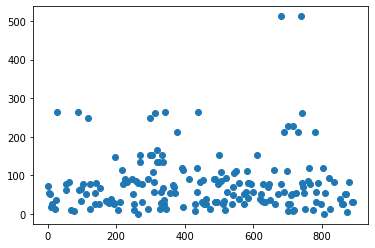

In [24]:
plt.scatter(df["PassengerId"], df["Fare"])

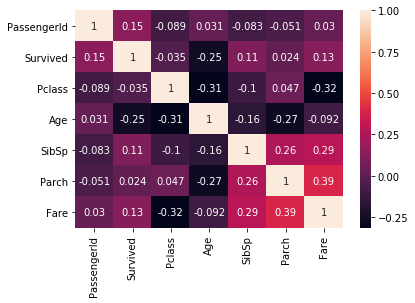

In [25]:
sns.heatmap(df.corr(), annot=True)

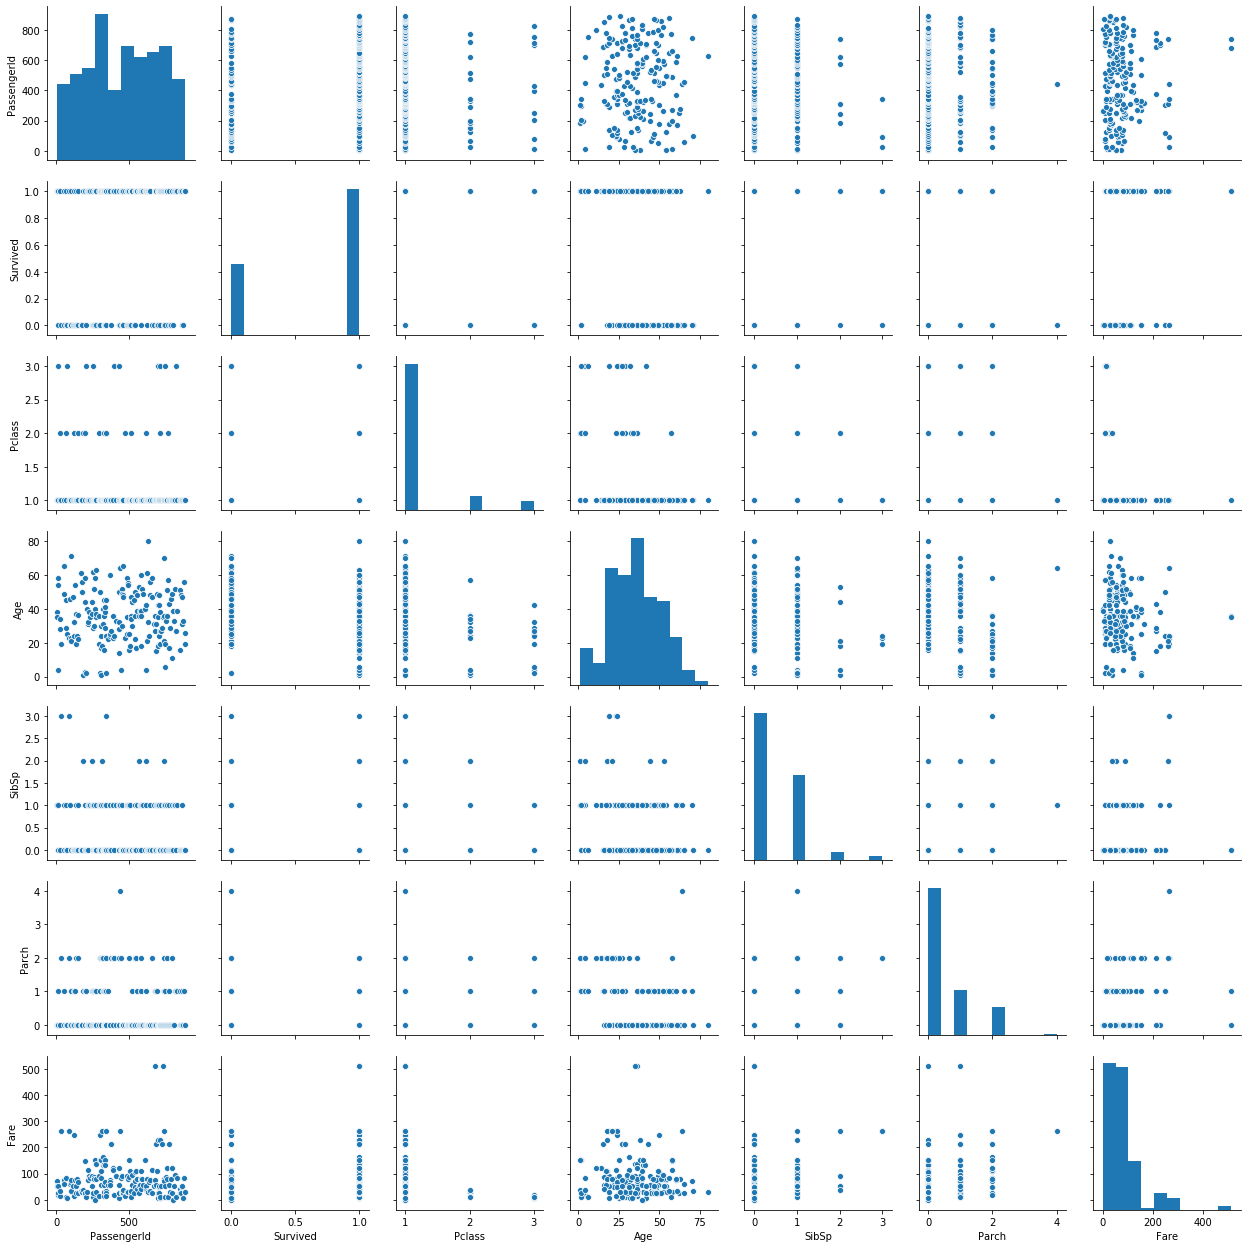

In [26]:
sns.pairplot(df)

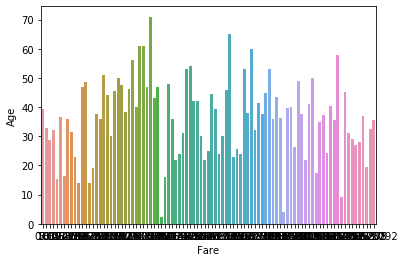

In [33]:
sns.barplot(x=df["Fare"], y=df["Age"], ci=0)

### 5. Outlier Detection

In [34]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


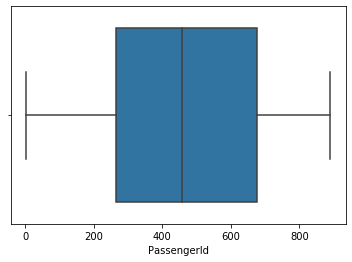

In [36]:
sns.boxplot(df["PassengerId"])

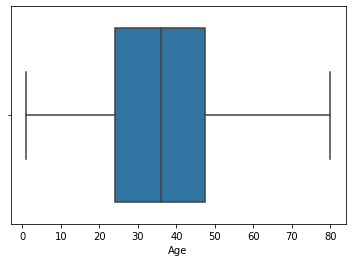

In [38]:
sns.boxplot(df["Age"])

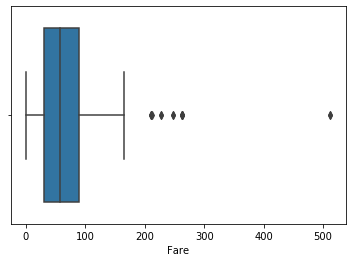

In [39]:
sns.boxplot(df["Fare"])

### 6. Splitting Dependent and Independent Variables

In [40]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [105]:
#independent variables should be 2-d array or dataframe
X = df.drop(columns=["Survived"], axis=1)
X.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [106]:
X.shape

(183, 11)

In [107]:
type(X)

pandas.core.frame.DataFrame

In [108]:
Y=df["Survived"]
Y.head()

1     1
3     1
6     0
10    1
11    1
Name: Survived, dtype: int64

### 7. Encoding

In [109]:
X.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [110]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [111]:
X["Sex"]=le.fit_transform(X["Sex"])

In [112]:
X.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
6,7,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,S
10,11,3,"Sandstrom, Miss. Marguerite Rut",0,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,"Bonnell, Miss. Elizabeth",0,58.0,0,0,113783,26.5500,C103,S


In [113]:
print(le.classes_)

['female' 'male']


In [114]:
mapping=dict(zip(le.classes_, range(len(le.classes_))))
mapping

{'female': 0, 'male': 1}

### 8. Train Test Splitting

In [115]:
from sklearn.model_selection import train_test_split

In [118]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3)

In [119]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(128, 11) (55, 11) (128,) (55,)
